#Tools:
1. Google Bigquery: to filter the data
2. Google Colab: to clean the data
3. Google Data Studio: to visualize the data

#Table of interest:  
`bigquery-public-data.iowa_liquor_sales.sales`

#Defining the Problems
This case study will focus on Pocahontas county.
1. How many cities that have liquor stores? Which city that have most liquor stores? 
2. Which vendor that have most ordered by stores in 2022?
3. How much difference of average price that Alcoholic Beverage 
Division paid and store paid for each bottle ordered in last 6 
months? 

#Exploring the Data
1. Data Filtering
   
   QUERY:
    
    SELECT date, upper(county) as county,city, zip_code, store_number, store_name, vendor_number, vendor_name, state_bottle_cost, state_bottle_retail
    
    FROM `bigquery-public-data.iowa_liquor_sales.sales`
    
    WHERE county = 'POCAHONTAS'
2. Data Cleaning
*  Remove duplicate data
*  Change data type
*  Remove outliers
*  Fix string to proper case

#Explore Data

In [9]:
import pandas as pd
sales = pd.read_csv('liquor_sales_pocahontas.csv')
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24886 entries, 0 to 24885
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 24886 non-null  object 
 1   county               24886 non-null  object 
 2   city                 24886 non-null  object 
 3   zip_code             24886 non-null  float64
 4   store_number         24886 non-null  int64  
 5   store_name           24886 non-null  object 
 6   vendor_number        24886 non-null  float64
 7   vendor_name          24886 non-null  object 
 8   state_bottle_cost    24886 non-null  float64
 9   state_bottle_retail  24886 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 1.9+ MB


#Cleaning Data
1. Check duplicates


In [10]:
sales.drop_duplicates()

,date,county,city,zip_code,store_number,store_name,vendor_number,vendor_name,state_bottle_cost,state_bottle_retail
0,2017-06-21,POCAHONTAS,Pocahontas,50574.0,3783,Dyno's Wine and Spirits / Pocahontas,370.0,PERNOD RICARD USA,14.99,22.49
1,2020-01-17,POCAHONTAS,Pocahontas,50574.0,3783,Dyno's Wine and Spirits / Pocahontas,370.0,PERNOD RICARD USA,6.49,9.74
2,2018-01-03,POCAHONTAS,Pocahontas,50574.0,3783,Dyno's Wine and Spirits / Pocahontas,370.0,PERNOD RICARD USA,14.99,22.49
3,2017-11-29,POCAHONTAS,Pocahontas,50574.0,3783,Dyno's Wine and Spirits / Pocahontas,434.0,LUXCO INC,9.00,13.50
4,2019-08-02,POCAHONTAS,Pocahontas,50574.0,3783,Dyno's Wine and Spirits / Pocahontas,434.0,LUXCO INC,7.84,11.76
...,...,...,...,...,...,...,...,...,...,...
24880,2021-10-22,POCAHONTAS,Pocahontas,50574.0,6101,Brew Oil #26 / Pocahontas,125.0,CEDAR RIDGE VINEYARDS LL,18.10,27.15
24882,2022-02-25,POCAHONTAS,Pocahontas,50574.0,6101,Brew Oil #26 / Pocahontas,305.0,Mhw LTD,10.49,15.74
24883,2021-04-16,POCAHONTAS,Pocahontas,50574.0,6101,Brew Oil #26 / Pocahontas,55.0,SAZERAC NORTH AMERICA,6.00,9.00
24884,2021-05-07,POCAHONTAS,Pocahontas,50574.0,6101,Brew Oil #26 / Pocahontas,192.0,"Mast-Jagermeister US, Inc",13.00,19.50


2. Change data type: zip_code, store_number, vendor_number to string

In [11]:
sales['zip_code'] = sales['zip_code'].astype('str')
sales['store_number'] = sales['store_number'].astype('str')
sales['vendor_number'] = sales['vendor_number'].astype('str')
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24886 entries, 0 to 24885
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 24886 non-null  object 
 1   county               24886 non-null  object 
 2   city                 24886 non-null  object 
 3   zip_code             24886 non-null  object 
 4   store_number         24886 non-null  object 
 5   store_name           24886 non-null  object 
 6   vendor_number        24886 non-null  object 
 7   vendor_name          24886 non-null  object 
 8   state_bottle_cost    24886 non-null  float64
 9   state_bottle_retail  24886 non-null  float64
dtypes: float64(2), object(8)
memory usage: 1.9+ MB


3. Check Outliers

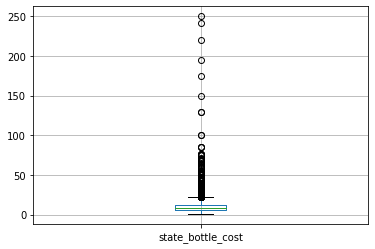

In [12]:
#Before
sales.boxplot(column='state_bottle_cost')

In [13]:
sales['state_bottle_cost'].describe()

count    24886.000000
mean        10.035532
std          7.339613
min          0.890000
25%          6.000000
50%          8.250000
75%         12.450000
max        250.000000
Name: state_bottle_cost, dtype: float64

In [14]:
percentile25 = sales['state_bottle_cost'].quantile(0.25)
percentile75 = sales['state_bottle_cost'].quantile(0.75)
upper_limit = percentile75 + 1.5 * (percentile75-percentile25)
lower_limit = percentile25 - 1.5 * (percentile75-percentile25)

In [15]:
sales = sales[sales['state_bottle_cost'] > lower_limit]
sales = sales[sales['state_bottle_cost'] < upper_limit]
sales['state_bottle_cost'].describe()

count    23789.000000
mean         8.997656
std          4.343013
min          0.890000
25%          5.650000
50%          7.990000
75%         11.440000
max         22.000000
Name: state_bottle_cost, dtype: float64

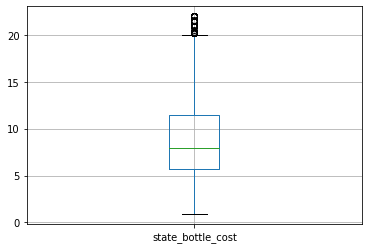

In [16]:
#After
sales.boxplot(column='state_bottle_cost')

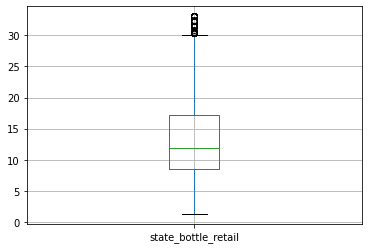

In [17]:
sales.boxplot(column='state_bottle_retail')

In [18]:
sales['state_bottle_retail'].describe()

count    23789.000000
mean        13.498545
std          6.514693
min          1.340000
25%          8.480000
50%         11.990000
75%         17.160000
max         33.000000
Name: state_bottle_retail, dtype: float64

In [19]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23789 entries, 0 to 24885
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 23789 non-null  object 
 1   county               23789 non-null  object 
 2   city                 23789 non-null  object 
 3   zip_code             23789 non-null  object 
 4   store_number         23789 non-null  object 
 5   store_name           23789 non-null  object 
 6   vendor_number        23789 non-null  object 
 7   vendor_name          23789 non-null  object 
 8   state_bottle_cost    23789 non-null  float64
 9   state_bottle_retail  23789 non-null  float64
dtypes: float64(2), object(8)
memory usage: 2.0+ MB


4. Fix county, city and vendor_name to PROPER CASE

In [20]:
sales['county'] = sales['county'].str.title()
sales['county'].unique()

array(['Pocahontas'], dtype=object)

In [21]:
sales['city'] = sales['city'].str.title()
sales['city'].unique()

array(['Pocahontas', 'Laurens', 'Fonda', 'Rolfe'], dtype=object)

In [22]:
sales['vendor_name'] = sales['vendor_name'].str.title()
sales['vendor_name'].unique()

array(['Pernod Ricard Usa', 'Luxco Inc', 'Castle Brands',
       'Ole Smoky Distillery Llc', 'Sazerac Company  Inc',
       'E & J Gallo Winery', 'Diageo Americas', 'Skyy Spirits Inc',
       'Piedmont Distillers Inc', 'Infinium Spirits', 'Jim Beam Brands',
       'Bacardi Usa Inc', 'Heaven Hill Brands', 'Proximo', 'Mhw Ltd',
       'Sazerac North America', 'Phillips Beverage',
       'Mccormick Distilling Co.', 'Laird & Company',
       'Fifth Generation Inc', 'Constellation Brands Inc',
       'Edrington Group Usa Llc', 'Western Spirits Beverage',
       'Dunkel Corporation', 'Brown Forman Corp.', 'Moet Hennessy Usa',
       'Cedar Ridge Vineyards Ll', 'Campari America',
       'Prestige Wine & Spirits Group', 'Mast-Jagermeister Us, Inc',
       'Disaronno International', 'S&B Farms Distillery',
       'Mango Bottling', 'Charles Jacquin Et Cie', 'Oz Spirits Llc',
       'Stoli Group', 'Famous Brands',
       'Sidney Frank Importing Company, Inc.', 'William Grant & Sons Inc',
       '

5. Check unique data

In [23]:
sales['zip_code'].unique()

array(['50574.0', '50554.0', '50540.0', '50581.0'], dtype=object)

In [ ]:
sales['store_number'].unique()

In [25]:
sales['vendor_number'].unique()

array(['370.0', '434.0', '91.0', '346.0', '421.0', '205.0', '260.0',
       '461.0', '384.0', '255.0', '65.0', '35.0', '259.0', '395.0',
       '305.0', '55.0', '380.0', '300.0', '297.0', '301.0', '115.0',
       '266.0', '492.0', '154.0', '85.0', '420.0', '125.0', '619.0',
       '322.0', '192.0', '130.0', '578.0', '308.0', '285.0', '402.0',
       '277.0', '565.0', '240.0', '389.0', '368.0', '163.0', '306.0',
       '208.0', '330.0', '325.0', '273.0', '184.0', '962.0', '538.0',
       '118.0', '229.0', '626.0', '777.0', '195.0', '410.0', '353.0',
       '654.0', '772.0', '112.0', '519.0', '460.0', '482.0', '121.0',
       '493.0', '521.0', '481.0', '633.0'], dtype=object)

#Download Cleaned Data to CSV

In [ ]:
sales.to_csv('Liquor Sales Pocahontas cleaned.csv')
from google.colab import files
files.download('Liquor Sales Pocahontas cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Visualize The Data
To visualize the data, I'm using Google Data Studio. You can find more information at this link: https://datastudio.google.com/s/lPwkzTSJl7Q

#Insight
1. Most of our customers are in Pocahontas, we can intensify large promos there.
2. Monthly sales are busy on April, we can give special promotions on that day suchas "April Sale".
3. The number of vendors affects sales in each city. Increase the number of vendors in the other 3 cities.
4. Give special promotions to the vendor leaderboard every month.